#**Hypotheses:**

##1. H0 (Null Hypothesis):
There is no difference in conversion rates between PSA and Ad campaigns.
##2.  H1 (Alternative Hypothesis):
There is a difference in conversion rates between PSA and Ad campaigns.


###3. Significance level (alpha) = 0.05


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("/content/marketing_AB.csv")
df = df.drop(columns=['Unnamed: 0'])
df['converted'] = df['converted'].astype(int)

df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,0,130,Monday,20
1,1119715,ad,0,93,Tuesday,22
2,1144181,ad,0,21,Tuesday,18
3,1435133,ad,0,355,Tuesday,10
4,1015700,ad,0,276,Friday,14


In [2]:
control = df[df['test group'] == 'psa']['converted']
test = df[df['test group'] == 'ad']['converted']

control.mean(), test.mean()


(np.float64(0.01785410644448223), np.float64(0.025546559636683747))

In [3]:
t_stat, p_value = stats.ttest_ind(test, control)
p_value

np.float64(1.7033052627831264e-13)

In [4]:
alpha = 0.05

if p_value < alpha:
    print("Statistically significant result")
else:
    print("Not statistically significant result")


Statistically significant result


In [5]:
diff = test.mean() - control.mean()

se = np.sqrt(
    test.var()/len(test) +
    control.var()/len(control)
)

ci_low = diff - 1.96 * se
ci_high = diff + 1.96 * se

ci_low, ci_high


(np.float64(0.005950865393694588), np.float64(0.009434040990708447))

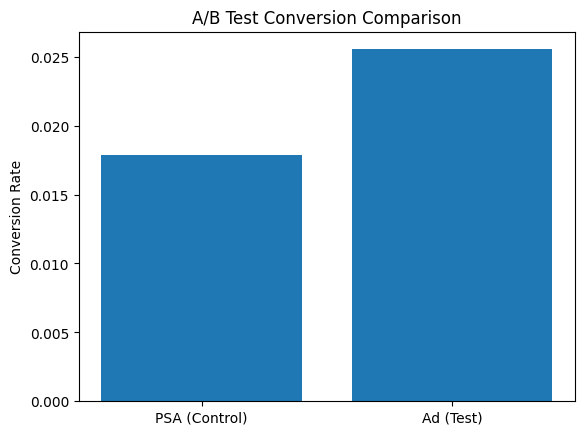

In [6]:
plt.bar(
    ['PSA (Control)', 'Ad (Test)'],
    [control.mean(), test.mean()]
)
plt.ylabel("Conversion Rate")
plt.title("A/B Test Conversion Comparison")
plt.show()


In [7]:
summary = pd.DataFrame({
    "group": ["psa", "ad"],
    "conversion_rate": [control.mean(), test.mean()],
    "sample_size": [len(control), len(test)]
})

summary.to_csv("ab_test_summary.csv", index=False)
summary


,group,conversion_rate,sample_size
0,psa,0.017854,23524
1,ad,0.025547,564577
